In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
%matplotlib inline

PI = np.pi

Diffusion equation
$$ u_t=u_{xx}$$
$$ \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} $$


with initial conditions:
$$ u(x,0) = \sin{\pi x L}$$

and boundary conditions:


$$ u(0,t) = 0$$
$$ u(L,t) = 0$$

The centered difference formulas for five-point stencils approximating second derivative:

$$ f''(x)\approx \frac {-f(x+2h)+16f(x+h)-30f(x)+16f(x-h)-f(x-2h)}{12h^{2}} $$
 
 $$\frac{\partial u(x,t)}{\partial t} = \frac{\partial^2 u}{\partial x^2}  = \frac {-f(x+2h)+16f(x+h)-30f(x)+16f(x-h)-f(x-2h)}{12h^{2}}$$
 
 

$$ \frac{u^{n+1}_i - u^n_i}{t^{n+1}-t^n} = \frac {-u^n_{i+2} + 16\cdot u^n_{i+1} -30\cdot u^n_i +16\cdot u^n_{i-1} -u_{n-2}}{12 (x_{i+1}-x_i) ^{2}}$$

Using a substitution:
* $\Delta x= x_{i+1}-x_i$, $i \in (0, N_x)$
* $\Delta t = t^{n+1}-t^n $, $n \in (0, N_t)$

We get:

$$ u^{n+1}_i  = u^n_i  + \frac{\Delta t}{12 \Delta x^2} \left[-u^n_{i+2} + 16\cdot u^n_{i+1} -30\cdot u^n_i +16\cdot u^n_{i-1} -u_{n-2} \right] $$

From the boundary conditions we have: 
* $\forall n: u_0^n = 0$
* $\forall n: u_{Nx}^n = 0$
* $\forall i: u_i^0 = \sin{\left( \frac{\pi x_i}{L}\right)}$

From the symmetry properties of $\sin{\left( \frac{\pi x_i}{L}\right)}$:
* $\forall n: u_{-1}^n = -u_{1}^n$
* $\forall n: u_{L+1}^n = -u_{L}^n$

## Initialization

In [2]:
Nx= 100
Nt = 100000
T = 10
L = 5

xx = np.linspace(0, L, Nx+1)
tt = np.linspace(0, T, Nt+1)

dx = xx[1] - xx[0]
dt = tt[1] - tt[0]

y = np.empty((Nt+1,Nx+1))

# set initial conditions at t-0
y[0,:] = np.sin(PI*xx/L) 

## set boundary conditions:
y[:,0] = 0   
y[:,Nx] = 0  

In [3]:
def five_point_strencil(y, Nx, Nt, xx, tt):
    F = dt/(12*dx**2)
    for n in range(1,Nt+1):
        for i in range(2,Nx-1): 
            y[n][i] = y[n-1][i] + F*(-y[n-1][i+2] + 16*y[n-1][i+1] - 30*y[n-1][i] + 16*y[n-1][i-1]-y[n-1][i-2])
        y[n][1] = y[n-1][1] + F*(-y[n-1][3] + 16*y[n-1][2] - 30*y[n-1][1] + 16*y[n-1][0]+y[n-1][1])
        y[n][Nx-1] = y[n-1][Nx-1] + F*(y[n-1][Nx-1] + 16*y[n-1][Nx] - 30*y[n-1][Nx-1] + 16*y[n-1][Nx-2] -y[n-1][Nx-3])

        return y

In [4]:
def thee_point_strencil(y, Nx, Nt, xx, tt):      
    F = dt/(dx**2)
    for i in range(1,Nt+1):
        for j in range(1,Nx): 
            y[i][j] = y[i-1][j] + F*(y[i-1][j-1] - 2*y[i-1][j] + y[i-1][j+1])
    return y

In [5]:
y3 = thee_point_strencil(y, Nx, Nt, xx, tt)

In [6]:
y5 = five_point_strencil(y, Nx, Nt, xx, tt)

## visualization

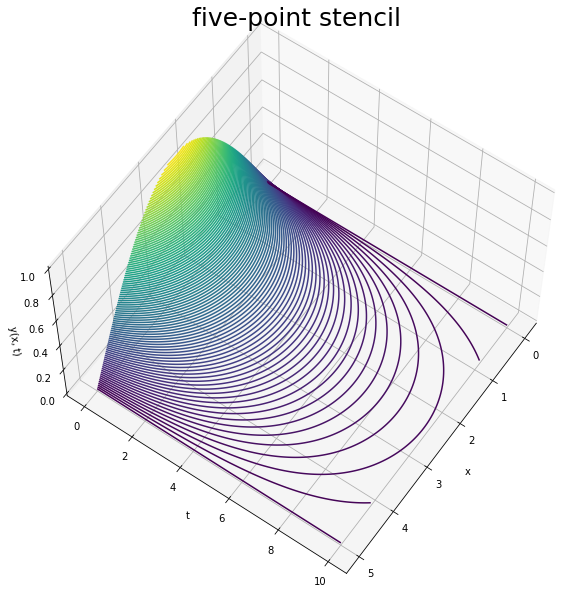

In [7]:
X, T = np.meshgrid(xx, tt)

fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, T, y5, 100, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('y(x, t)');
ax.set_title('five-point stencil', fontsize = 25)
ax.view_init(60, 35);

# three-point strencil

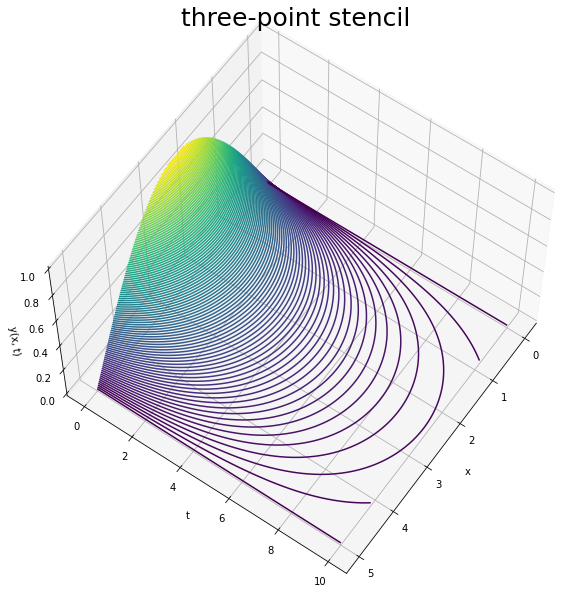

In [8]:
X, T = np.meshgrid(xx, tt)

fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, T, y3, 100, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('y(x, t)');
ax.set_title('three-point stencil', fontsize = 25)
ax.view_init(60, 35)